# Reading flac files

In [1]:
%matplotlib inline

import soundfile as sf
import matplotlib.pyplot as plt

In [7]:
data, samplerate = sf.read('data/dev-clean/3576/138058/3576-138058-0021.flac', dtype='float32')

In [8]:
samplerate

16000

In [9]:
data.shape

(98880,)

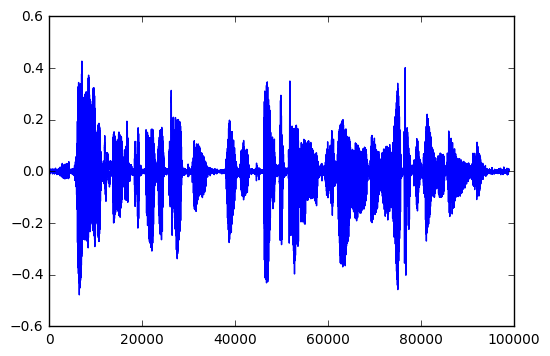

In [10]:
plt.plot(data)

In [11]:
print('Audio is {:f} seconds long'.format(data.shape[0] / samplerate))

Audio is 6.180000 seconds long


# Generating training data

In [93]:
import data_utils
            
vocabulary = data_utils.Vocabulary()
reader = data_utils.SpeechCorpusReader('data', vocabulary)

i_sizes = list()
o_sizes = list()
ratios = list()

for i, o in reader.generate_samples('train-clean-100', infinite=False, fragment_length=1024/samplerate):
  i_size = i.shape[0]
  o_size = len(o)
  ratio = i_size / o_size

  i_sizes.append(i_size)
  o_sizes.append(o_size)
  ratios.append(ratio)

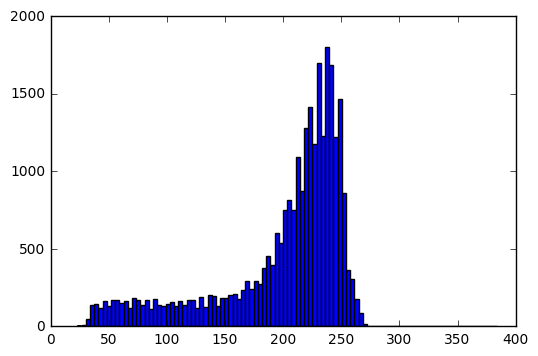

In [94]:
plt.hist(i_sizes, bins=100)
plt.show()

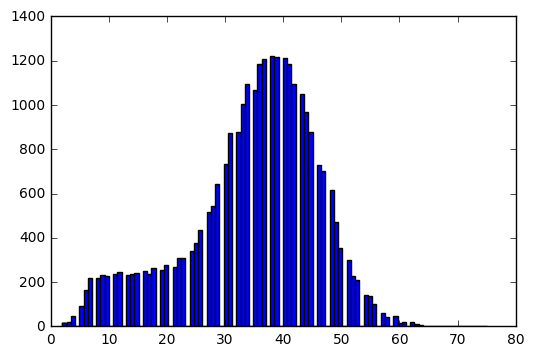

In [95]:
plt.hist(o_sizes, bins=100)
plt.show()

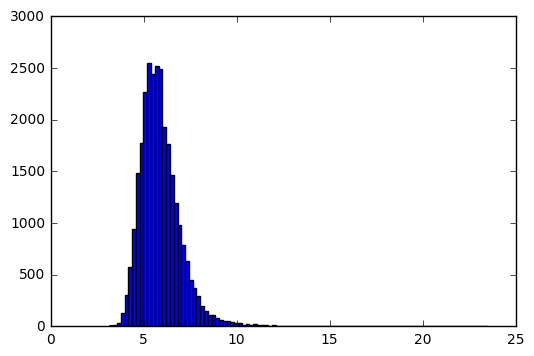

In [96]:
plt.hist(ratios, bins=100)
plt.show()

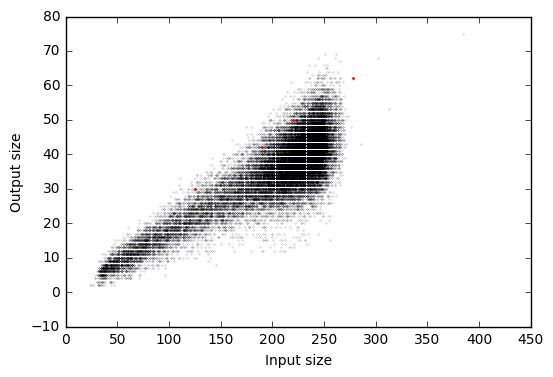

In [106]:
ax = plt.scatter(i_sizes, o_sizes, s=0.01).axes
ax.set_xlabel('Input size')
ax.set_ylabel('Output size')
plt.scatter([125, 190, 220, 278], [30, 42, 50, 62], color='red', s=1)
plt.show()

# Recording audio

In [88]:
%matplotlib inline

import record
import numpy as np

In [89]:
data, width = record.AudioRecorder(rate=samplerate).record()

In [90]:
data = np.array(data)

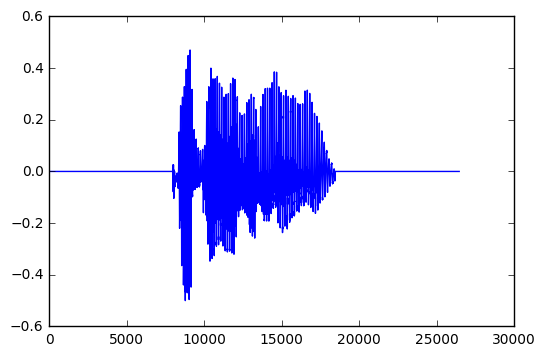

In [91]:
plt.plot(data)

In [92]:
print('Audio is {:f} seconds long'.format(data.shape[0] / samplerate))

Audio is 1.653375 seconds long
